# Linear Regression with Eager API

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set eager api
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
# training data
n_samples = 20
X = np.arange(n_samples).reshape((n_samples, 1))
Y = 1.5 * X + np.random.randn(n_samples, 1) + 5
print(X.shape)
print(Y.shape)

(20, 1)
(20, 1)


In [4]:
# parameters
learning_rate = 0.01
n_steps = 2000
display_step = 50

In [5]:
# model parameters
W = tfe.Variable(tf.random_normal([1, 1]), name='weights')
b = tfe.Variable(tf.zeros([1, 1]), name='bias')

def linear_regression(X):
    return X * W + b

def loss_fn(model_fn, X, label):
    return tf.reduce_sum(tf.pow(model_fn(X) - label, 2)) / (2 * n_samples)

# SGD optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# compute gradient
grad = tfe.implicit_gradients(loss_fn)

In [6]:
print('initial loss = {:.9f}'.format(loss_fn(linear_regression, X, Y)),
      'W =', W.numpy(), 'b =', b.numpy()
     )

for i in range(n_steps):
    optimizer.apply_gradients(grad(linear_regression, X, Y))
    if (i + 1) % display_step == 0:
        print('step:', i+1, 'loss: {:.9f}'.format(loss_fn(linear_regression, X, Y)), 'W:', W.numpy()[0][0], 'b:', b.numpy()[0][0])

initial loss = 11.091503143 W = [[1.5254859]] b = [[0.]]
step: 50 loss: 3.220890045 W: 1.8105724 b: 0.67581856
step: 100 loss: 2.570645094 W: 1.7667494 b: 1.244283
step: 150 loss: 2.073268175 W: 1.7284223 b: 1.7414559
step: 200 loss: 1.692823648 W: 1.6949018 b: 2.1762767
step: 250 loss: 1.401818514 W: 1.6655852 b: 2.556567
step: 300 loss: 1.179226518 W: 1.6399453 b: 2.8891647
step: 350 loss: 1.008965254 W: 1.6175208 b: 3.1800504
step: 400 loss: 0.878730774 W: 1.5979086 b: 3.4344568
step: 450 loss: 0.779113829 W: 1.580756 b: 3.6569576
step: 500 loss: 0.702916801 W: 1.5657545 b: 3.8515534
step: 550 loss: 0.644632459 W: 1.5526344 b: 4.021746
step: 600 loss: 0.600050628 W: 1.5411595 b: 4.1705947
step: 650 loss: 0.565949678 W: 1.5311239 b: 4.3007755
step: 700 loss: 0.539865792 W: 1.5223467 b: 4.414631
step: 750 loss: 0.519914329 W: 1.5146705 b: 4.514207
step: 800 loss: 0.504653037 W: 1.5079569 b: 4.601294
step: 850 loss: 0.492979378 W: 1.5020851 b: 4.6774616
step: 900 loss: 0.484050512 W: 1

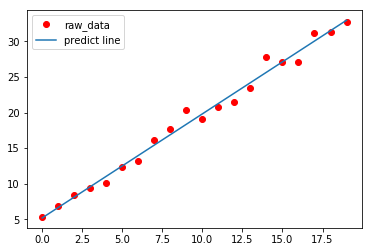

In [8]:
plt.plot(X, Y, 'ro', label='raw_data')
plt.plot(X, W.numpy()[0][0] * X + b.numpy()[0][0], label='predict line')
plt.legend()
plt.show()